## Exo5

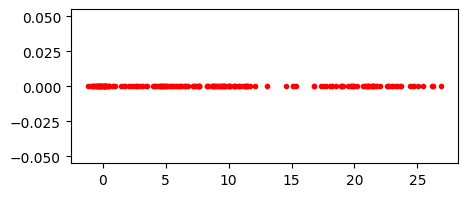

In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

load = loadmat('Exo5.mat')
x_data = load['x']
x_min = np.min(x_data)
x_max = np.max(x_data)
y = np.zeros(x_data.shape)
plt.figure(figsize=(5,2))
plt.plot(x_data,y, '.r')
plt.show()

D'abord, tracer les histogrammes avec différentes tailles pour les bins (h = 0.1, 0.5, 1, 2)

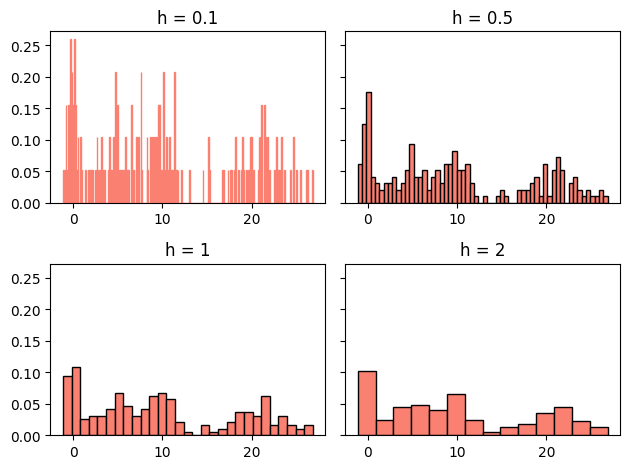

In [2]:
N_points = x_data.shape[1]

n_bins1 = (np.ceil(x_max) - np.floor(x_min))/0.1
n_bins2 = (np.ceil(x_max) - np.floor(x_min))/0.5
n_bins3 = (np.ceil(x_max) - np.floor(x_min))/1
n_bins4 = (np.ceil(x_max) - np.floor(x_min))/2

fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0,0].hist(x_data[0,:], bins=int(n_bins1), color='salmon', edgecolor='salmon', density=True)
axs[0,1].hist(x_data[0,:], bins=int(n_bins2), color='salmon', edgecolor='black', density=True)
axs[1,0].hist(x_data[0,:], bins=int(n_bins3), color='salmon', edgecolor='black', density=True)
axs[1,1].hist(x_data[0,:], bins=int(n_bins4), color='salmon', edgecolor='black', density=True)

axs[0,0].set_title('h = 0.1')
axs[0,1].set_title('h = 0.5')
axs[1,0].set_title('h = 1')
axs[1,1].set_title('h = 2')
plt.show()

In [3]:
def noyau_gauss(u):
    return np.exp(-(u**2)/2)/np.sqrt(2*np.pi)

def noyau_carre(u):
    if np.abs(u) <= 1/2:
        return 1
    else:
        return 0
    
def noyau_triangle(u):
    if np.abs(u) <= 1:
        return 1-np.abs(u)
    else:
        return 0
    
def noyau_bartlett(u):
    if np.abs(u) <= 1:
        return (3/4)*(1-u**2)
    else:
        return 0
    
def noyau_biweight(u):
    if np.abs(u) <= 1:
        return (15/16)*(1-u**2)**2
    else:
        return 0

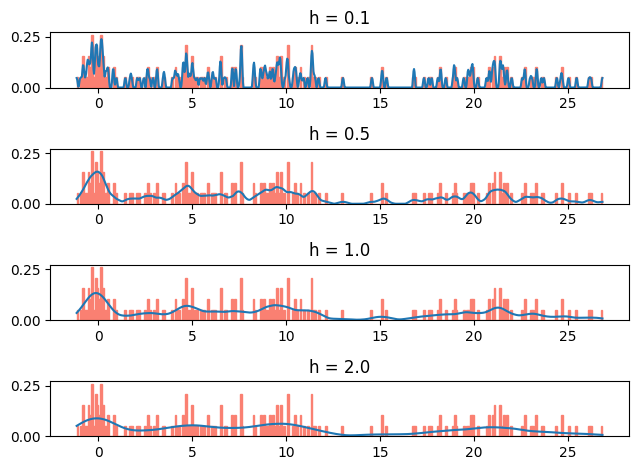

In [7]:
# Cas gaussien
X_pdf = np.linspace(x_min, x_max, 1000)
fig, axs = plt.subplots(4, 1, sharey=True, tight_layout=True)

for j, h in enumerate([0.1, 0.5, 1, 2]):
    Y_pdf = np.zeros(X_pdf.shape)
    for k, x_pdf in enumerate(X_pdf):
        somme = 0
        for i in range(N_points):
            somme += noyau_biweight((x_pdf - x_data[0,i])/h)
        Y_pdf[k] = (1/(N_points*h)) * somme
    axs[j].hist(x_data[0,:], bins=int(n_bins1), color='salmon', edgecolor='salmon', density=True)
    axs[j].plot(X_pdf, Y_pdf, label='PDF')
    axs[j].set_title('h = {:.1f}'.format(h))

plt.show()

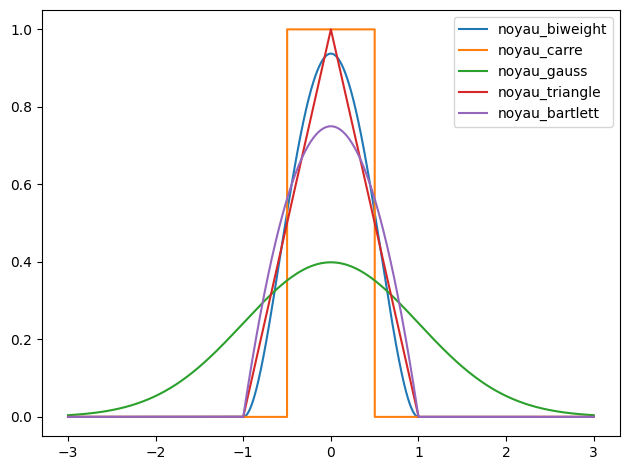

In [20]:

fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

# Liste des fonctions de noyau
noyaux = [noyau_biweight, noyau_carre, noyau_gauss, noyau_triangle, noyau_bartlett]
X_pdf = np.arange(-3, 3, 0.0001)

for j, noyau in enumerate(noyaux):
    Y_pdf = np.zeros(X_pdf.shape)
    for k, x_pdf in enumerate(X_pdf):
        
        Y_pdf[k] = noyau(x_pdf)
    
    axs.plot(X_pdf, Y_pdf, label=noyau.__name__)
    
plt.legend()
plt.show()
